### Import Dataset

In [15]:
import pandas as pd
import numpy as np 

In [16]:
test_pd = pd.read_csv("../datasets/fashion/fashion-mnist_test.csv")
train_pd = pd.read_csv("../datasets/fashion/fashion-mnist_train.csv")

### Pre Process Data

In [17]:
from tensorflow.keras.utils import to_categorical

test_label = test_pd["label"].to_numpy()
test = test_pd.drop(columns="label").to_numpy()
train_label = train_pd["label"].to_numpy()
train = train_pd.drop(columns="label").to_numpy()

train = train / 255
test = test / 255
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

train = train.reshape(-1,28,28,1)
test = test.reshape(-1,28,28,1)

print(train.shape, train_label.shape, train_label[0])

(60000, 28, 28, 1) (60000, 10) [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


### Define Model

In [18]:
import keras

model = keras.Sequential([])
model.add(keras.layers.Conv2D(64, kernel_size=(7,7), strides=[1,1], padding="valid", input_shape=(28,28,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=[2,2]))

# model.add(keras.layers.Conv2D(16, kernel_size=(3,3), strides=[1,1], padding="valid"))
# model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.Activation("relu"))
# model.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=[2,2]))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=200, activation="relu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=100, activation="relu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=10, activation="softmax"))

model.compile(optimizer="adam", loss=keras.losses.CategoricalCrossentropy(), metrics=["accuracy"])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 22, 22, 64)     │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 22, 22, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 200)            │     1,549,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,573,566 (6.00 MB)

 Trainable params: 1,573,438 (6.00 MB)

 Non-trainable params: 128 (512.00 B)

In [19]:
callback  = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True) 
history = model.fit(train, train_label, batch_size=128, epochs=10, validation_data=(test, test_label), callbacks=[callback])

Epoch 1/10


2025-01-16 13:29:05.922759: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


469/469 ━━━━━━━━━━━━━━━━━━━━ 62s 129ms/step - accuracy: 0.7258 - loss: 0.7855 - val_accuracy: 0.8542 - val_loss: 0.4197
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 59s 127ms/step - accuracy: 0.8600 - loss: 0.3924 - val_accuracy: 0.8779 - val_loss: 0.3369
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 64s 135ms/step - accuracy: 0.8793 - loss: 0.3332 - val_accuracy: 0.8917 - val_loss: 0.2920
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 68s 144ms/step - accuracy: 0.8912 - loss: 0.2996 - val_accuracy: 0.9004 - val_loss: 0.2699
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 75s 130ms/step - accuracy: 0.9007 - loss: 0.2755 - val_accuracy: 0.8960 - val_loss: 0.2830
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 60s 128ms/step - accuracy: 0.9038 - loss: 0.2613 - val_accuracy: 0.8917 - val_loss: 0.2890
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 61s 130ms/step - accuracy: 0.9113 - loss: 0.2393 - val_accuracy: 0.9085 - val_loss: 0.2536
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 61s 130ms/step - accuracy: 0.9164 - loss: 0.2254 - val

In [20]:
model.evaluate(test, test_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9111 - loss: 0.2591


[0.2526264488697052, 0.9122999906539917]

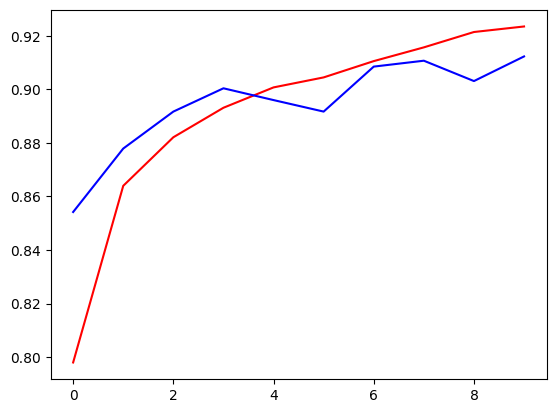

: 

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], color="red")
plt.plot(history.history["val_accuracy"],  color="blue")
plt.show()